In [1]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'text.latex.preamble' : [r'\usepackage{amsmath, amsfonts}']})
plt.rc('text', usetex=True)
plt.rc('font', size=12)

# Least Square

In [34]:
def ls(x, y, reg=.1):
    return Ridge(alpha=reg, fit_intercept=False).fit(x, y).coef_


def sample(n=100000, e=1):
    x = np.random.randn(n, 1) * e
    y = x + np.random.randn(n, 1) * e
    z = y + np.random.randn(n, 1)
    return np.hstack((x, z)), y

def penalty_ls(x, y, phi, w, reg=.1):
    p = np.linalg.norm(ls(x @ phi, y, reg) - w) 
    return p


def penalty_g(x, y, phi, w):
    p = (phi.T @ x.T @ x @ phi @ w - phi.T @ x.T @ y) / x.shape[0]
    return np.linalg.norm(p) ** 2

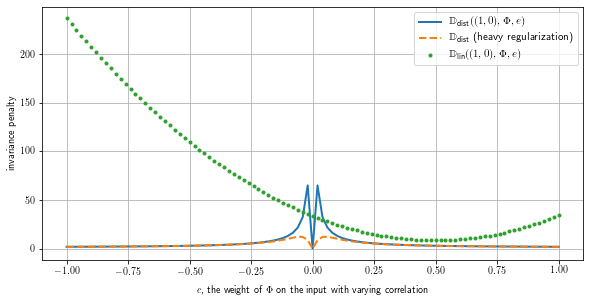

In [36]:
x1, y1 = sample(e=1)
x2, y2 = sample(e=2)

tt = np.linspace(-1, 1, 100 + 1)
plot_y_ls = []
plot_y_ls_reg = []
plot_y_1 = []

for t in tt:
    phi = np.diag([1, t])
    w = np.array([1, 0])
    # phi = np.array([[1],[t]])
    # w = np.ones(1)
    plot_y_ls.append(penalty_ls(x1, y1, phi, w) + penalty_ls(x2,y2,phi, w))
    plot_y_ls_reg.append(penalty_ls(x1, y1, phi, w, reg=1000) + penalty_ls(x2,y2,phi, w, reg=1000))
    plot_y_1.append(penalty_g(x1, y1, phi, w) + penalty_g(x2, y2, phi, w))

plt.figure(figsize=(8, 4))
plt.plot(tt, plot_y_ls, lw=2, label=r'$\mathbb{D}_{\text{dist}}((1, 0), \Phi, e)$')
plt.plot(tt, plot_y_ls_reg, ls="--", lw=2, label=r'$\mathbb{D}_{\text{dist}}$ (heavy regularization)')
plt.plot(tt, plot_y_1, '.', lw=2, label=r'$\mathbb{D}_{\text{lin}}((1, 0), \Phi, e)$')
# plt.ylim(-1, 12)
plt.grid()
plt.xlabel(r'$c$, the weight of $\Phi$ on the input with varying correlation', labelpad=10)
plt.ylabel(r'invariance penalty')
plt.tight_layout(0, 0, 0)
plt.legend(prop={'size': 11}, loc="upper right")
plt.show()


In [37]:

# SOMETHING is wrong. check dimensionality of w and phi

# Need to work tomorrow on getting my report done for the predoc.